# Universidad del Valle de Guatemala
## Facultad de Ingeniería
### Departamento de Computación

---

# Proyecto 2: Resultados Iniciales
### Reto 04: Predicción de compradores recurrentes: cuestionar la línea base - Negocios

**Integrantes:**
- Diego Alexander Hernández Silvestre, 21270
- Linda Inés Jiménez Vides, 21169
- Mario Antonio Guerra Morales, 21008
- David Jonathan Aragon Vasquez, 21053

**Curso:** Data Science  
**Sección:** 10  
**Grupo** 4  

---

Guatemala, 28 de octubre de 2024


##### 🫳 Para la descarga del dataset de este reto, es necesario la creación de una cuenta dentro de Alibaba Cloud. Para facilitar este proceso se proporcionan los elementos a descargar en estos enlaces:
- Data_Format1: https://drive.google.com/file/d/1jgsaSM0wypPMUWaNlXy5s_kO0uiXNzES/view?usp=sharing
- Data_Format2: https://drive.google.com/file/d/1dnMeaon-ovASN2HEI1WSNfnw-7lyINAh/view?usp=drivesdk
- sample_submission.csv: 

In [21]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

### 📩 Carga de los datos

In [ ]:
dataTrain_timestamp = pd.read_csv('data/dataTrain_balanced_timestamp.csv')
dataTrain = pd.read_csv('data/dataTrain_balanced.csv')

In [8]:
dataTrain.head()

,Unnamed: 0.1,user_id,age_range,gender,merchant_id,item_id,category_id,brand_id,clicks,add_to_cart,purchases,add_to_favorites,total_actions,unique_item_count,label
0,0,34176,6.0,0.0,944,408895,1505,7370,1,0,0,0,1,1,-1
1,1,34176,6.0,0.0,412,17235,1604,4396,8,0,0,0,8,7,-1
2,2,34176,6.0,0.0,1945,231901,662,2758,7,0,0,0,7,3,-1
3,3,34176,6.0,0.0,4752,174142,821,6938,1,0,0,0,1,1,-1
4,4,34176,6.0,0.0,643,716371,1505,968,0,0,0,1,1,1,-1


In [17]:
dataTrain.head()

,Unnamed: 0.1,user_id,age_range,gender,merchant_id,item_id,category_id,brand_id,clicks,add_to_cart,purchases,add_to_favorites,total_actions,unique_item_count,label
0,0,34176,6.0,0.0,944,408895,1505,7370,1,0,0,0,1,1,-1
1,1,34176,6.0,0.0,412,17235,1604,4396,8,0,0,0,8,7,-1
2,2,34176,6.0,0.0,1945,231901,662,2758,7,0,0,0,7,3,-1
3,3,34176,6.0,0.0,4752,174142,821,6938,1,0,0,0,1,1,-1
4,4,34176,6.0,0.0,643,716371,1505,968,0,0,0,1,1,1,-1


In [22]:
print("Data Train Timestamp\n")
dataTrain_timestamp.info()
dataTrain_timestamp.count()

print("\nData Train without Timestamp\n")
dataTrain.info()
dataTrain.count()

Data Train Timestamp

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20300811 entries, 0 to 20300810
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0.1       int64  
 1   user_id            int64  
 2   age_range          float64
 3   gender             float64
 4   merchant_id        int64  
 5   item_id            int64  
 6   category_id        int64  
 7   brand_id           int64  
 8   clicks             int64  
 9   add_to_cart        int64  
 10  purchases          int64  
 11  add_to_favorites   int64  
 12  total_actions      int64  
 13  unique_item_count  int64  
 14  label              int64  
 15  time_stamp         object 
dtypes: float64(2), int64(13), object(1)
memory usage: 2.4+ GB

Data Train without Timestamp

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20300811 entries, 0 to 20300810
Data columns (total 15 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 

Unnamed: 0.1         20300811
user_id              20300811
age_range            20300811
gender               20300811
merchant_id          20300811
item_id              20300811
category_id          20300811
brand_id             20300811
clicks               20300811
add_to_cart          20300811
purchases            20300811
add_to_favorites     20300811
total_actions        20300811
unique_item_count    20300811
label                20300811
dtype: int64

In [19]:
dataTrain.describe()

,Unnamed: 0.1,user_id,age_range,gender,merchant_id,item_id,category_id,brand_id,clicks,add_to_cart,purchases,add_to_favorites,total_actions,unique_item_count,label
count,2.030081e+07,2.030081e+07,2.030081e+07,2.030081e+07,2.030081e+07,2.030081e+07,2.030081e+07,2.030081e+07,2.030081e+07,2.030081e+07,2.030081e+07,2.030081e+07,2.030081e+07,2.030081e+07,2.030081e+07
mean,3.513824e+06,2.116874e+05,3.037811e+00,3.359498e-01,2.512599e+03,5.559079e+05,8.667681e+02,4.163890e+03,8.630119e+00,5.517021e-06,9.027854e-01,3.033002e-01,1.008873e+01,4.353554e+00,0.000000e+00
std,2.027742e+06,1.215602e+05,1.710790e+00,4.892762e-01,1.287225e+03,3.217158e+05,3.902042e+02,2.163676e+03,2.279894e+01,2.410922e-03,8.730307e-01,1.382527e+00,2.359851e+01,8.344923e+00,8.164966e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00
25%,1.765179e+06,1.056220e+05,2.000000e+00,0.000000e+00,1.480000e+03,2.750960e+05,5.960000e+02,2.368000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,-1.000000e+00
50%,3.513432e+06,2.122770e+05,3.000000e+00,0.000000e+00,2.492000e+03,5.548880e+05,8.490000e+02,4.073000e+03,4.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,5.000000e+00,2.000000e+00,0.000000e+00
75%,5.261091e+06,3.166630e+05,4.000000e+00,7.078987e-01,3.596000e+03,8.307000e+05,1.180000e+03,5.910000e+03,9.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.100000e+01,4.000000e+00,1.000000e+00
max,7.030722e+06,4.241700e+05,8.000000e+00,2.000000e+00,4.995000e+03,1.113166e+06,1.671000e+03,8.477000e+03,6.962000e+03,2.000000e+00,2.020000e+02,3.980000e+02,6.963000e+03,1.194000e+03,1.000000e+00


C:\Users\acer\AppData\Local\Temp\ipykernel_8364\2748666227.py:51: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  chunk['time_stamp'] = pd.to_datetime(chunk['time_stamp'], errors='coerce')
C:\Users\acer\AppData\Local\Temp\ipykernel_8364\2748666227.py:51: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  chunk['time_stamp'] = pd.to_datetime(chunk['time_stamp'], errors='coerce')
C:\Users\acer\AppData\Local\Temp\ipykernel_8364\2748666227.py:51: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  chunk['time_stamp'] = pd.to_datetime(chunk['time_stamp'], errors='coerce')
C:\Users\acer\AppDa

Accuracy: 0.7037695284647439
Confusion Matrix:
[[1330628    4992   18263]
 [  98931  857733  396373]
 [  51012  633173  669058]]
Classification Report:
              precision    recall  f1-score   support

          -1       0.90      0.98      0.94   1353883
           0       0.57      0.63      0.60   1353037
           1       0.62      0.49      0.55   1353243

    accuracy                           0.70   4060163
   macro avg       0.70      0.70      0.70   4060163
weighted avg       0.70      0.70      0.70   4060163



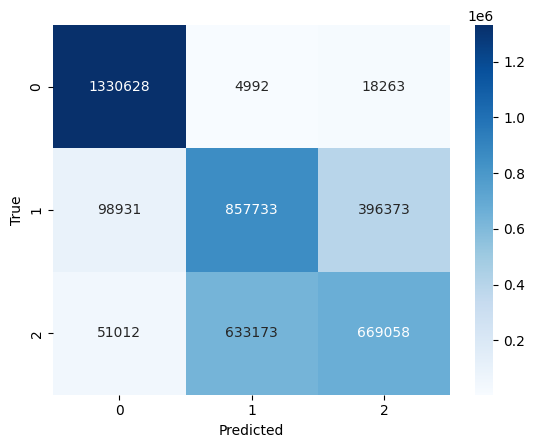

In [14]:
# Función para reducir el uso de memoria ajustando los tipos de datos
def reduce_mem_usage(df):
    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()

            if str(col_type).startswith('int'):
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                else:
                    df[col] = df[col].astype(np.int64)
            else:
                df[col] = df[col].astype(np.float32)

    return df

# Definir el tamaño del chunk
chunk_size = 100000  # Puedes ajustar este tamaño según tu memoria disponible

# Leer el dataset por fragmentos y procesarlo
data_chunks = pd.read_csv('data/dataTrain_balanced_timestamp.csv', chunksize=chunk_size, usecols=[
    'user_id', 'age_range', 'gender', 'merchant_id', 'item_id', 'category_id', 
    'brand_id', 'clicks', 'add_to_cart', 'purchases', 'add_to_favorites', 
    'total_actions', 'unique_item_count', 'label', 'time_stamp'
])

# Lista para almacenar los chunks procesados
data_list = []

for chunk in data_chunks:
    # Reducir el uso de memoria en cada chunk
    chunk = reduce_mem_usage(chunk)

    # Convertir la columna 'time_stamp' a tipo datetime
    chunk['time_stamp'] = pd.to_datetime(chunk['time_stamp'], errors='coerce')

    # Codificar las columnas categóricas con LabelEncoder
    le = LabelEncoder()
    chunk['gender'] = le.fit_transform(chunk['gender'].astype(str))
    chunk['age_range'] = le.fit_transform(chunk['age_range'].astype(str))

    # Agregar el chunk procesado a la lista
    data_list.append(chunk)

# Concatenar todos los chunks procesados
dataTrain_timestamp = pd.concat(data_list, axis=0)

# Definir características (X) y etiqueta (y)
X = dataTrain_timestamp.drop(columns=['label', 'time_stamp'])  # Excluir 'label' y 'time_stamp'
y = dataTrain_timestamp['label']

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Instanciar el modelo de Regresión Logística
model = LogisticRegression(max_iter=1000)

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Imprimir resultados
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Visualización de la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [22]:
dataTrain = pd.read_csv('data/dataTrain_balanced.csv')

In [4]:
dataTrain.drop('Unnamed: 0.1', axis=1)

,user_id,age_range,gender,merchant_id,item_id,category_id,brand_id,clicks,add_to_cart,purchases,add_to_favorites,total_actions,unique_item_count,label
0,34176,6.000000,0.000000,944,408895,1505,7370,1,0,0,0,1,1,-1
1,34176,6.000000,0.000000,412,17235,1604,4396,8,0,0,0,8,7,-1
2,34176,6.000000,0.000000,1945,231901,662,2758,7,0,0,0,7,3,-1
3,34176,6.000000,0.000000,4752,174142,821,6938,1,0,0,0,1,1,-1
4,34176,6.000000,0.000000,643,716371,1505,968,0,0,0,1,1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20300806,370527,1.153760,0.000000,3106,784544,505,1585,6,0,1,0,7,2,1
20300807,54019,0.454884,0.000000,3721,792286,817,4730,28,0,1,0,30,12,1
20300808,290457,3.621730,0.000000,1378,319129,763,5636,1,0,1,0,2,1,1
20300809,379183,2.118076,0.881924,1946,603389,1054,4322,3,0,1,0,4,1,1


In [23]:
# Crear una lista de transacciones binarizadas para Apriori
def create_transaction(row):
    transaction = []
    if row['clicks'] > 0:
        transaction.append('click')
    if row['add_to_cart'] > 0:
        transaction.append('add_to_cart')
    if row['purchases'] > 0:
        transaction.append('purchase')
    if row['add_to_favorites'] > 0:
        transaction.append('add_to_favorites')
    # Puedes agregar más según lo consideres necesario
    return transaction

# Filtrar sólo los usuarios recurrentes para encontrar patrones en ellos
df_recurrent = dataTrain[dataTrain['label'] == 1]
transactions = df_recurrent.apply(create_transaction, axis=1)

In [24]:
# Convertir la lista de transacciones a una matriz binaria
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_trans = pd.DataFrame(te_ary, columns=te.columns_)

# Ejecutar Apriori con un soporte mínimo
frequent_itemsets = apriori(df_trans, min_support=0.05, use_colnames=True)  # Ajusta min_support según tus datos
print(frequent_itemsets)


    support                             itemsets
0  0.167025                   (add_to_favorites)
1  0.943619                              (click)
2  0.998833                           (purchase)
3  0.162788            (add_to_favorites, click)
4  0.166780         (purchase, add_to_favorites)
5  0.942481                    (purchase, click)
6  0.162547  (purchase, add_to_favorites, click)


In [25]:
# Generar reglas de asociación
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)  # Ajusta el umbral según sea necesario
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

# Generar nuevas columnas en el dataset con reglas de asociación
for idx, rule in rules.iterrows():
    antecedent = list(rule['antecedents'])[0]
    if antecedent in dataTrain.columns:
        dataTrain[f'{antecedent}_rule'] = dataTrain[antecedent].apply(lambda x: 1 if x > 0 else 0)


                    antecedents        consequents   support  confidence  \
0            (add_to_favorites)            (click)  0.162788    0.974632   
1            (add_to_favorites)         (purchase)  0.166780    0.998530   
2                    (purchase)            (click)  0.942481    0.943582   
3                       (click)         (purchase)  0.942481    0.998794   
4  (purchase, add_to_favorites)            (click)  0.162547    0.974619   
5     (add_to_favorites, click)         (purchase)  0.162547    0.998516   
6            (add_to_favorites)  (purchase, click)  0.162547    0.973186   

       lift  
0  1.032866  
1  0.999696  
2  0.999961  
3  0.999961  
4  1.032852  
5  0.999682  
6  1.032578  


In [26]:
# Seleccionar las columnas con reglas y otras características que consideres necesarias
X = dataTrain.drop(['label'], axis=1)
y = dataTrain['label']

# Dividir en datos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Entrenar un modelo de bosque aleatorio
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
joblib.dump(clf, 'model_RandomForest_Final.joblib')

['model_RandomForest_Final.joblib']

In [31]:
import joblib
clf_cargado = joblib.load('model_RandomForest_Final.joblib')

In [10]:
# Usar el modelo cargado para hacer predicciones
y_pred = clf_cargado.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

Accuracy: 0.9784548058784832
              precision    recall  f1-score   support

          -1       0.99      0.95      0.97   1353883
           0       0.95      0.99      0.97   1353037
           1       1.00      1.00      1.00   1353243

    accuracy                           0.98   4060163
   macro avg       0.98      0.98      0.98   4060163
weighted avg       0.98      0.98      0.98   4060163



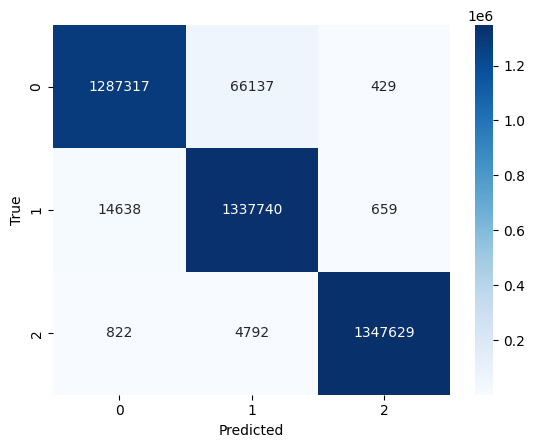

In [13]:
# Visualización de la matriz de confusión
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Obtener curvas de aprendizaje
train_sizes, train_scores, val_scores = learning_curve(clf_cargado, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

# Calcular medias y desviaciones estándar
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
val_scores_mean = val_scores.mean(axis=1)
val_scores_std = val_scores.std(axis=1)

# Graficar las curvas de aprendizaje
plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Entrenamiento")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Validación")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color="g")
plt.xlabel("Cantidad de datos de entrenamiento")
plt.ylabel("Precisión")
plt.title("Curvas de aprendizaje")
plt.legend(loc="best")
plt.show()

In [11]:
df_test = pd.read_csv('data/test_cleaned_data.csv')  # Reemplaza con la ruta a tu archivo de prueba
# Elimina columnas que contengan "Unnamed" en el nombre
df = df_test.loc[:, ~df_test.columns.str.contains('^Unnamed')]


In [13]:
df.head()

,user_id,age_range,gender,merchant_id,label,item_id,category_id,brand_id,time_stamp,action_type,clicks,add_to_cart,purchases,add_to_favorites,total_actions,unique_item_count
0,163968,0.0,0.0,4378,-1.0,101206,812,6968,"DatetimeIndex(['2023-06-14'], dtype='datetime6...",0,1,0,0,0,1,1
1,163968,0.0,0.0,2300,-1.0,588758,844,3833,"DatetimeIndex(['2023-06-18', '2023-11-11', '20...",0,9,0,2,0,11,4
2,163968,0.0,0.0,1551,-1.0,312747,243,1954,"DatetimeIndex(['2023-06-27', '2023-06-27', '20...",0,4,0,1,0,5,1
3,163968,0.0,0.0,4343,-1.0,932390,1612,3201,"DatetimeIndex(['2023-06-28'], dtype='datetime6...",0,1,0,0,0,1,1
4,163968,0.0,0.0,4911,-1.0,957657,662,3089,"DatetimeIndex(['2023-06-12'], dtype='datetime6...",0,1,0,0,0,1,1


In [15]:
df.drop('time_stamp', axis=1, inplace=True)

C:\Users\lijv1.LINDA_HP\AppData\Local\Temp\ipykernel_12492\1727089338.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('time_stamp', axis=1, inplace=True)


In [16]:
df.head()

,user_id,age_range,gender,merchant_id,label,item_id,category_id,brand_id,action_type,clicks,add_to_cart,purchases,add_to_favorites,total_actions,unique_item_count
0,163968,0.0,0.0,4378,-1.0,101206,812,6968,0,1,0,0,0,1,1
1,163968,0.0,0.0,2300,-1.0,588758,844,3833,0,9,0,2,0,11,4
2,163968,0.0,0.0,1551,-1.0,312747,243,1954,0,4,0,1,0,5,1
3,163968,0.0,0.0,4343,-1.0,932390,1612,3201,0,1,0,0,0,1,1
4,163968,0.0,0.0,4911,-1.0,957657,662,3089,0,1,0,0,0,1,1


In [ ]:
from sklearn.model_selection import learning_curve


train_sizes, train_scores, val_scores = learning_curve(
    clf_cargado, X_train, y_train, cv=5, scoring='accuracy', 
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

# Promedio y desviación estándar para los puntajes de entrenamiento y validación
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Precisión en Entrenamiento', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.plot(train_sizes, val_mean, label='Precisión en Validación', color='orange')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='orange', alpha=0.2)

plt.title('Curvas de Aprendizaje')
plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylabel('Precisión')
plt.legend()
plt.grid()
plt.show()
